In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np

from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
import pandas as pd

# Cargar el CSV
df = pd.read_csv("/content/Base_clientes_Monopoly-proc.csv")

# Separar características (X) y etiquetas (y)
X = df.drop(columns=["target"]).values  # Convierte a numpy array
y = df["target"].values

In [ ]:
np.unique(df["target"], return_counts=True)

(array([0, 1]), array([42632,  4435]))

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
# Definir el modelo
model = keras.Sequential([
    layers.Dense(64, activation="relu", input_shape=(X.shape[1],)),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")  # Para clasificación binaria
])

# Compilar el modelo
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Entrenar el modelo
history = model.fit(X, y, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1177/1177 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8972 - loss: 0.2606 - val_accuracy: 0.8853 - val_loss: 0.2659
Epoch 2/10
1177/1177 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9142 - loss: 0.1995 - val_accuracy: 0.8881 - val_loss: 0.2608
Epoch 3/10
1177/1177 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9177 - loss: 0.1911 - val_accuracy: 0.8881 - val_loss: 0.2676
Epoch 4/10
1177/1177 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9187 - loss: 0.1811 - val_accuracy: 0.8869 - val_loss: 0.2700
Epoch 5/10
1177/1177 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9178 - loss: 0.1822 - val_accuracy: 0.8870 - val_loss: 0.2749
Epoch 6/10
1177/1177 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9240 - loss: 0.1703 - val_accuracy: 0.8852 - val_loss: 0.2772
Epoch 7/10
1177/1177 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9275 - loss: 0.1625 - val_accuracy: 0.8842 - val_loss: 0.3188
Epoch 8/10
1177/1177 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9307 - loss: 0.1534 - val_accurac

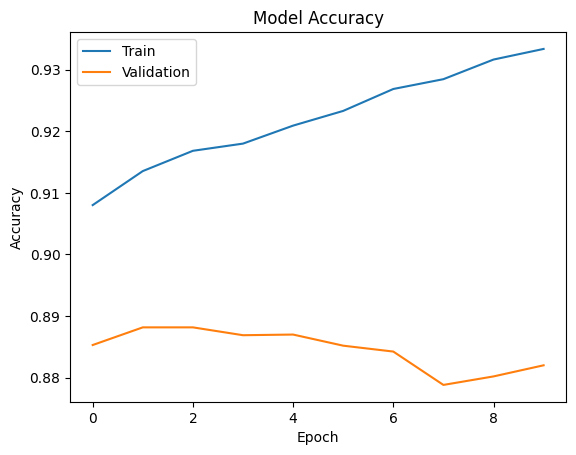

In [ ]:
# Plot results
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')